# Weather Data Exploration

This notebook performs analysis on the first 2016 rows of the weather.csv file, skipping the 'date' and 'OT' columns.

## Analyses:
1. Time-Series Line Charts (One Chart per Variable)
2. Rolling Average (24-Sample i.e. 4 hrs Window)
3. Histogram (Distribution)
4. Box Plot (Variability)
5. Scatter Plot (Correlation: Temperature vs RH and other correlated variables)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import acf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [57]:
# Load data
df = pd.read_csv('/content/PatchTST/datasets/weather/weather.csv')
df = df.iloc[:2016].drop(['date', 'OT'], axis=1)
print(f"Data shape: {df.shape}")
print("Columns:", list(df.columns))
df.head()

Data shape: (2016, 20)
Columns: ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m�)', 'PAR (�mol/m�/s)', 'max. PAR (�mol/m�/s)', 'Tlog (degC)']


p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
0   1008.89      0.71    273.18        -1.33    86.1          6.43   
1   1008.76      0.75    273.22        -1.44    85.2          6.45   
2   1008.66      0.73    273.21        -1.48    85.1          6.44   
3   1008.64      0.37    272.86        -1.64    86.3          6.27   
4   1008.61      0.33    272.82        -1.50    87.4          6.26   

   VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
0          5.54          0.89       3.42             5.49       1280.62   
1          5.49          0.95       3.39             5.45       1280.33   
2          5.48          0.96       3.39             5.43       1280.29   
3          5.41          0.86       3.35             5.37       1281.97   
4          5.47          0.79       3.38             5.42       1282.08   

   wv (m/s)  max. wv (m/s)  wd (deg)  rain (mm)  raining (s)  SWDR (W/m�)  \
0      1.02           1.60     224.3        0.0          0.0          0.0   
1      0.43           0.84     206.8        0.0          0.0          0.0   
2      0.61           1.48     197.1        0.0          0.0          0.0   
3      1.11           1.48     206.4        0.0          0.0          0.0   
4      0.49           1.40     209.6        0.0          0.0          0.0   

   PAR (�mol/m�/s)  max. PAR (�mol/m�/s)  Tlog (degC)  
0              0.0                   0.0        11.45  
1              0.0                   0.0        11.51  
2              0.0                   0.0        11.60  
3              0.0                   0.0        11.70  
4              0.0                   0.0        11.81

## 1. Time-Series Line Charts (One Chart per Variable)

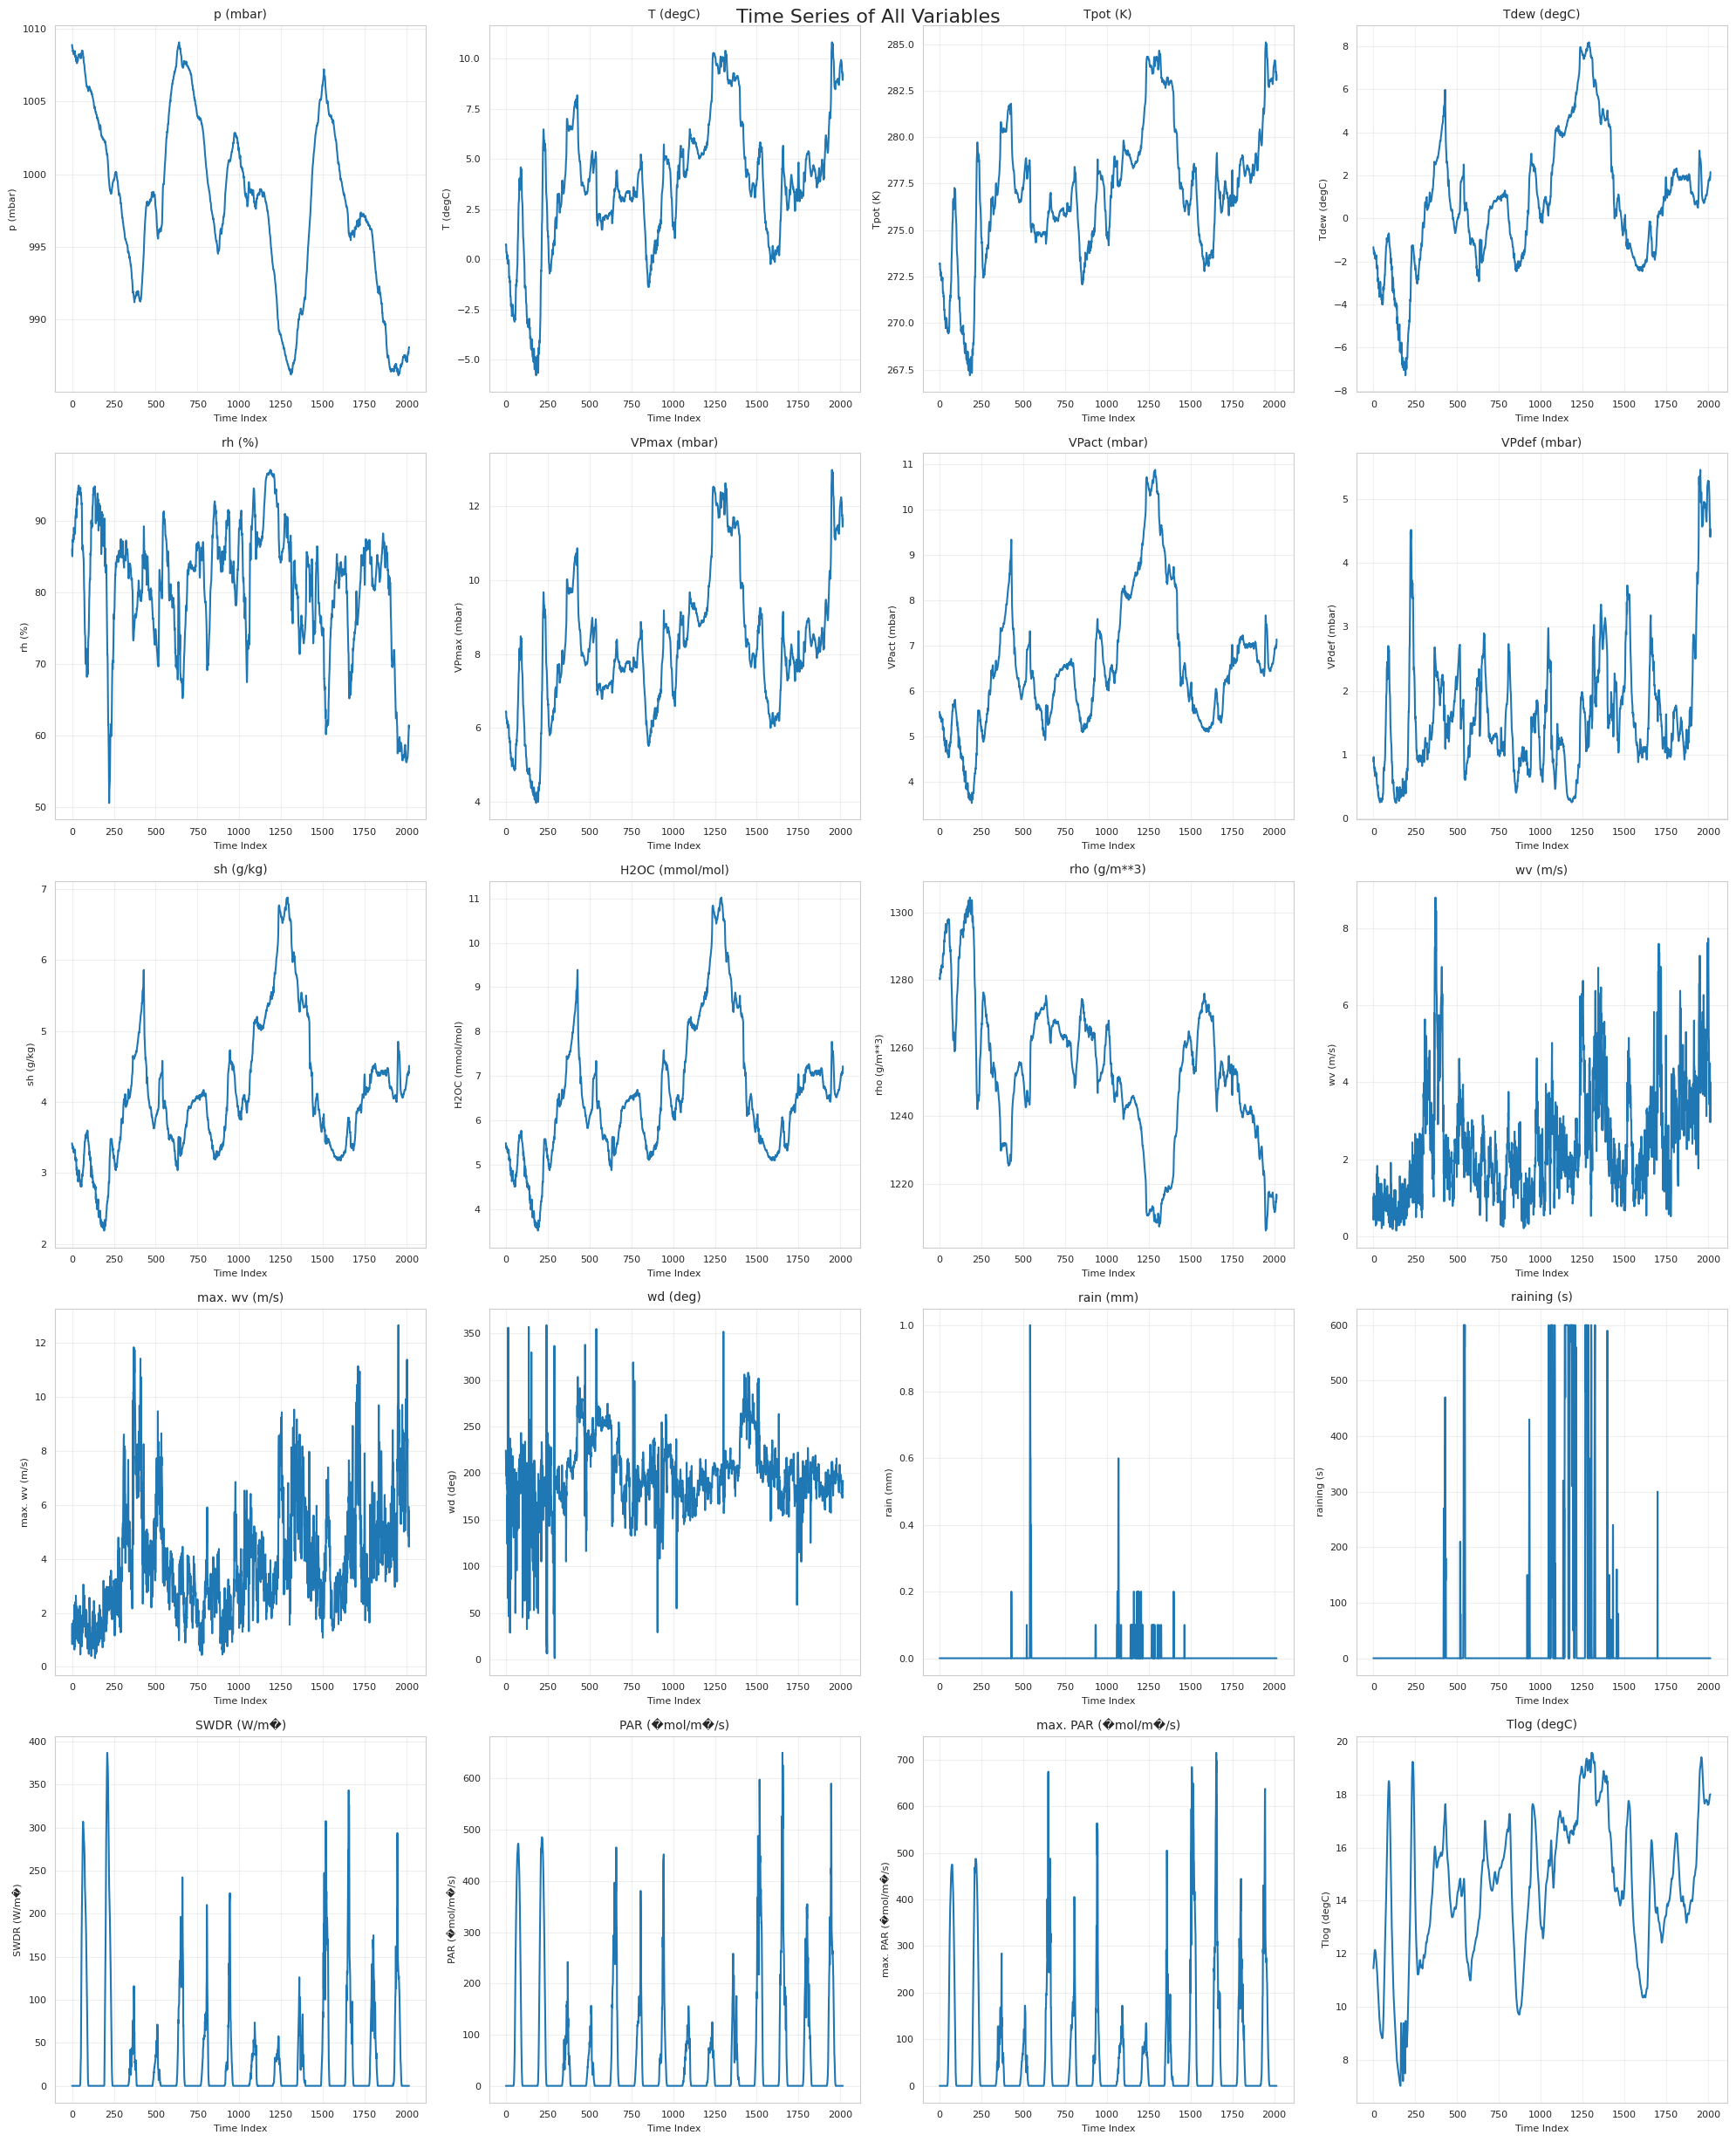

In [58]:
# Time-Series Line Charts in grids of 4
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Time Series of All Variables', fontsize=16, y=0.98)

for i, col in enumerate(df.columns):
    row = i // n_cols
    col_pos = i % n_cols
    
    if n_rows == 1:
        ax = axes[col_pos]
    else:
        ax = axes[row, col_pos]
    
    ax.plot(df.index, df[col], linewidth=1.5)
    ax.set_title(f'{col}', fontsize=10)
    ax.set_xlabel('Time Index', fontsize=8)
    ax.set_ylabel(col, fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide empty subplots
total_plots = n_rows * n_cols
for i in range(len(df.columns), total_plots):
    row = i // n_cols
    col_pos = i % n_cols
    if n_rows == 1:
        axes[col_pos].set_visible(False)
    else:
        axes[row, col_pos].set_visible(False)

plt.tight_layout()
plt.show()

## 2. Rolling Average (24-Sample Window)

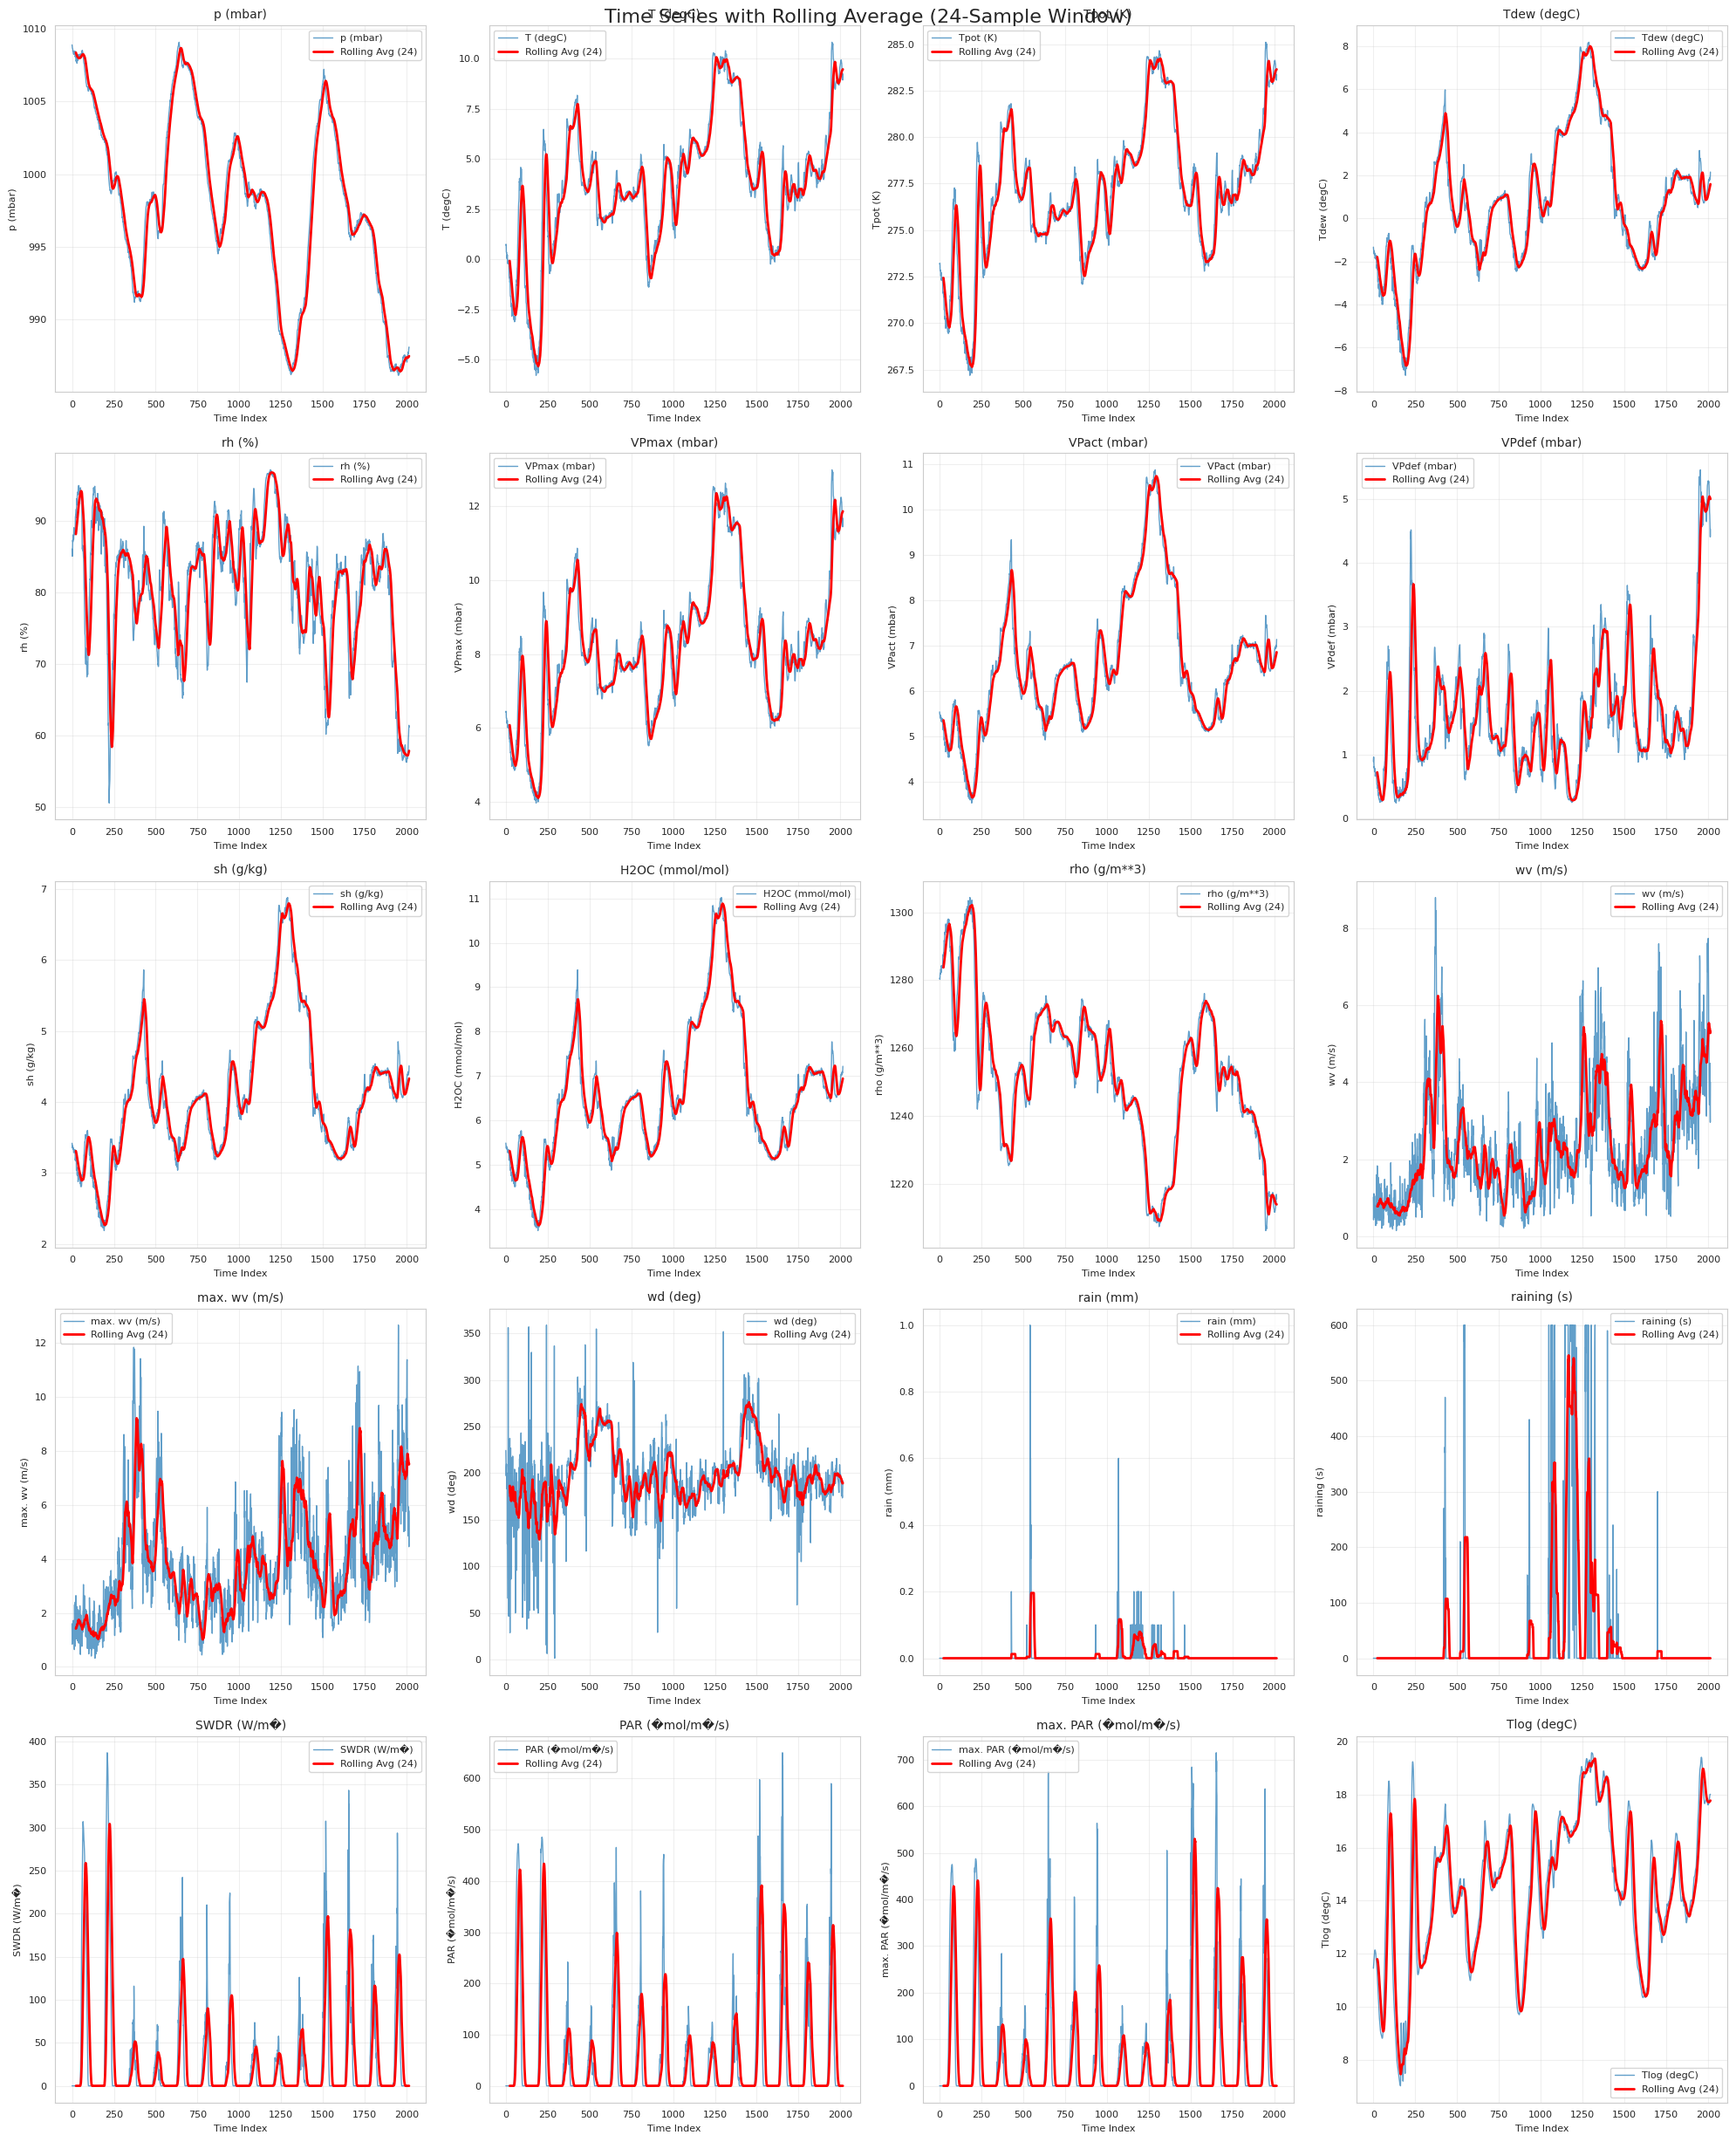

In [59]:
# Rolling Average Charts in grids of 4
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Time Series with Rolling Average (24-Sample Window)', fontsize=16, y=0.98)

for i, col in enumerate(df.columns):
    row = i // n_cols
    col_pos = i % n_cols
    
    if n_rows == 1:
        ax = axes[col_pos]
    else:
        ax = axes[row, col_pos]
    
    ax.plot(df.index, df[col], label=col, alpha=0.7, linewidth=1)
    ax.plot(df.index, df[col].rolling(window=24).mean(), label='Rolling Avg (24)', color='red', linewidth=2)
    ax.set_title(f'{col}', fontsize=10)
    ax.set_xlabel('Time Index', fontsize=8)
    ax.set_ylabel(col, fontsize=8)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide empty subplots
total_plots = n_rows * n_cols
for i in range(len(df.columns), total_plots):
    row = i // n_cols
    col_pos = i % n_cols
    if n_rows == 1:
        axes[col_pos].set_visible(False)
    else:
        axes[row, col_pos].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Histograms (Distribution)

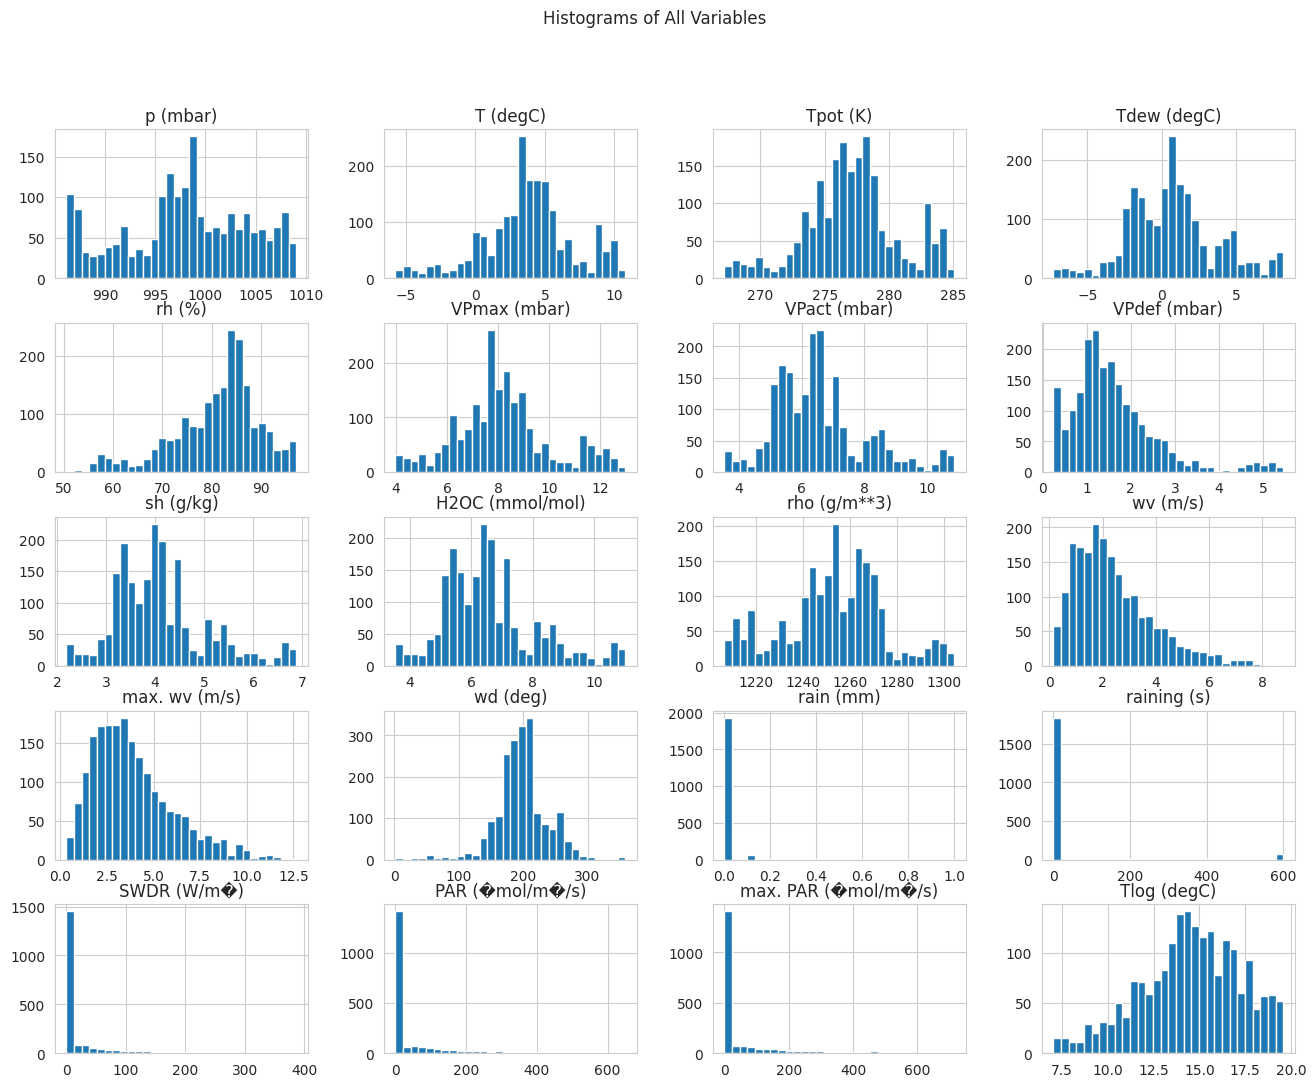

In [60]:
df.hist(figsize=(16, 12), bins=30)
plt.suptitle('Histograms of All Variables')
plt.show()

## 4. Box Plots (Variability)

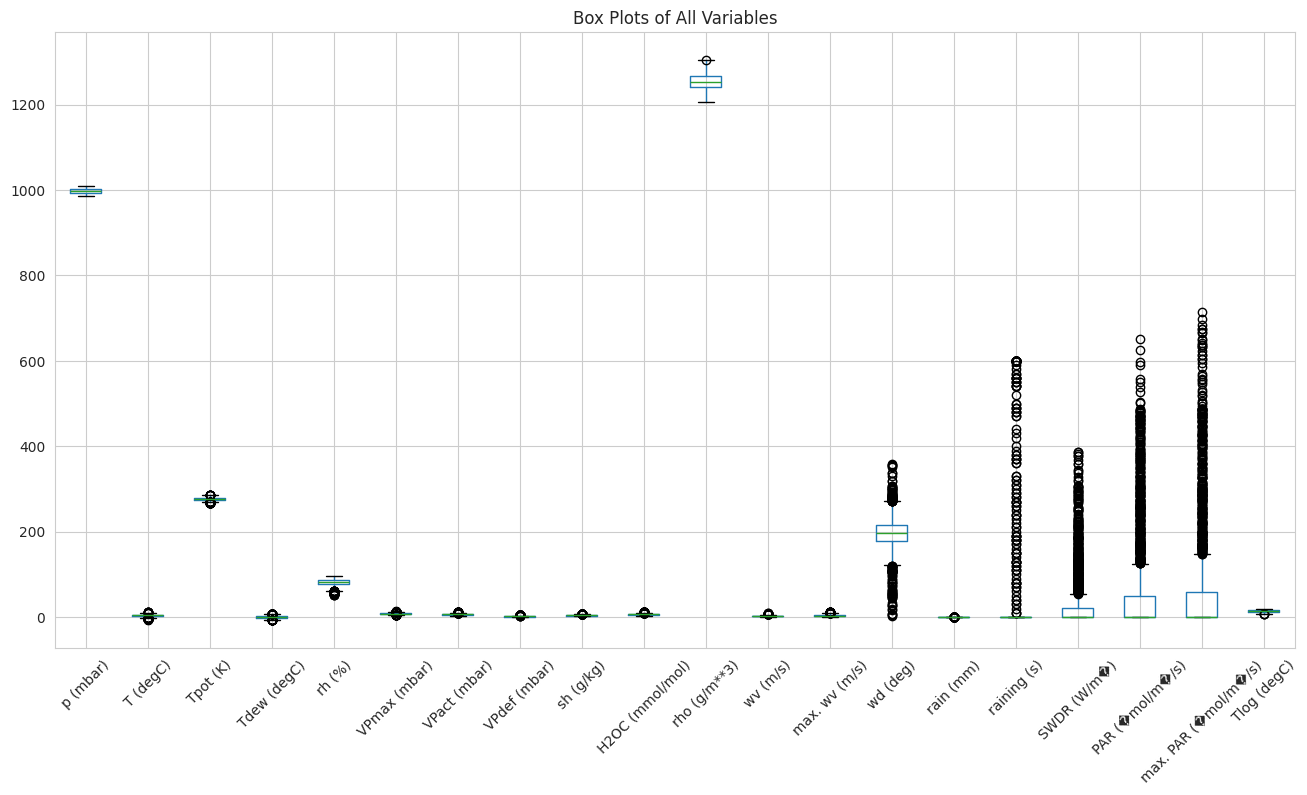

In [61]:
plt.figure(figsize=(16, 8))
df.boxplot(rot=45)
plt.title('Box Plots of All Variables')
plt.show()

## 5. Heatmap Correlation

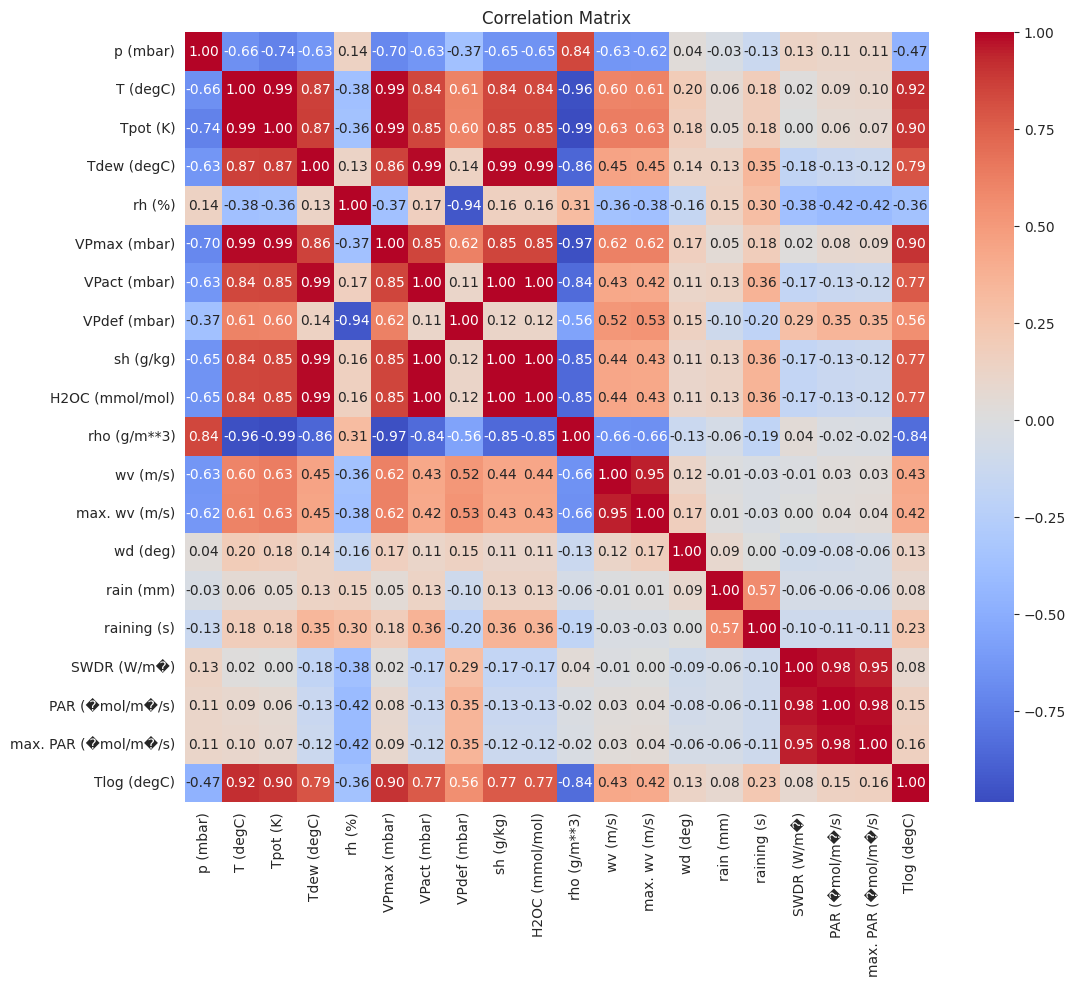

Highly correlated pairs (|corr| > 0.8):
p (mbar) vs rho (g/m**3): 0.84
T (degC) vs Tpot (K): 0.99
T (degC) vs Tdew (degC): 0.87
T (degC) vs VPmax (mbar): 0.99
T (degC) vs VPact (mbar): 0.84
T (degC) vs sh (g/kg): 0.84
T (degC) vs H2OC (mmol/mol): 0.84
T (degC) vs rho (g/m**3): -0.96
T (degC) vs Tlog (degC): 0.92
Tpot (K) vs Tdew (degC): 0.87
Tpot (K) vs VPmax (mbar): 0.99
Tpot (K) vs VPact (mbar): 0.85
Tpot (K) vs sh (g/kg): 0.85
Tpot (K) vs H2OC (mmol/mol): 0.85
Tpot (K) vs rho (g/m**3): -0.99
Tpot (K) vs Tlog (degC): 0.90
Tdew (degC) vs VPmax (mbar): 0.86
Tdew (degC) vs VPact (mbar): 0.99
Tdew (degC) vs sh (g/kg): 0.99
Tdew (degC) vs H2OC (mmol/mol): 0.99
Tdew (degC) vs rho (g/m**3): -0.86
rh (%) vs VPdef (mbar): -0.94
VPmax (mbar) vs VPact (mbar): 0.85
VPmax (mbar) vs sh (g/kg): 0.85
VPmax (mbar) vs H2OC (mmol/mol): 0.85
VPmax (mbar) vs rho (g/m**3): -0.97
VPmax (mbar) vs Tlog (degC): 0.90
VPact (mbar) vs sh (g/kg): 1.00
VPact (mbar) vs H2OC (mmol/mol): 1.00
VPact (mbar) vs rho (g/m

In [62]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Find highly correlated pairs (|corr| > 0.8)
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.8:
            high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

print("Highly correlated pairs (|corr| > 0.8):")
for pair in high_corr:
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.2f}")

## 6. Scatter Plot

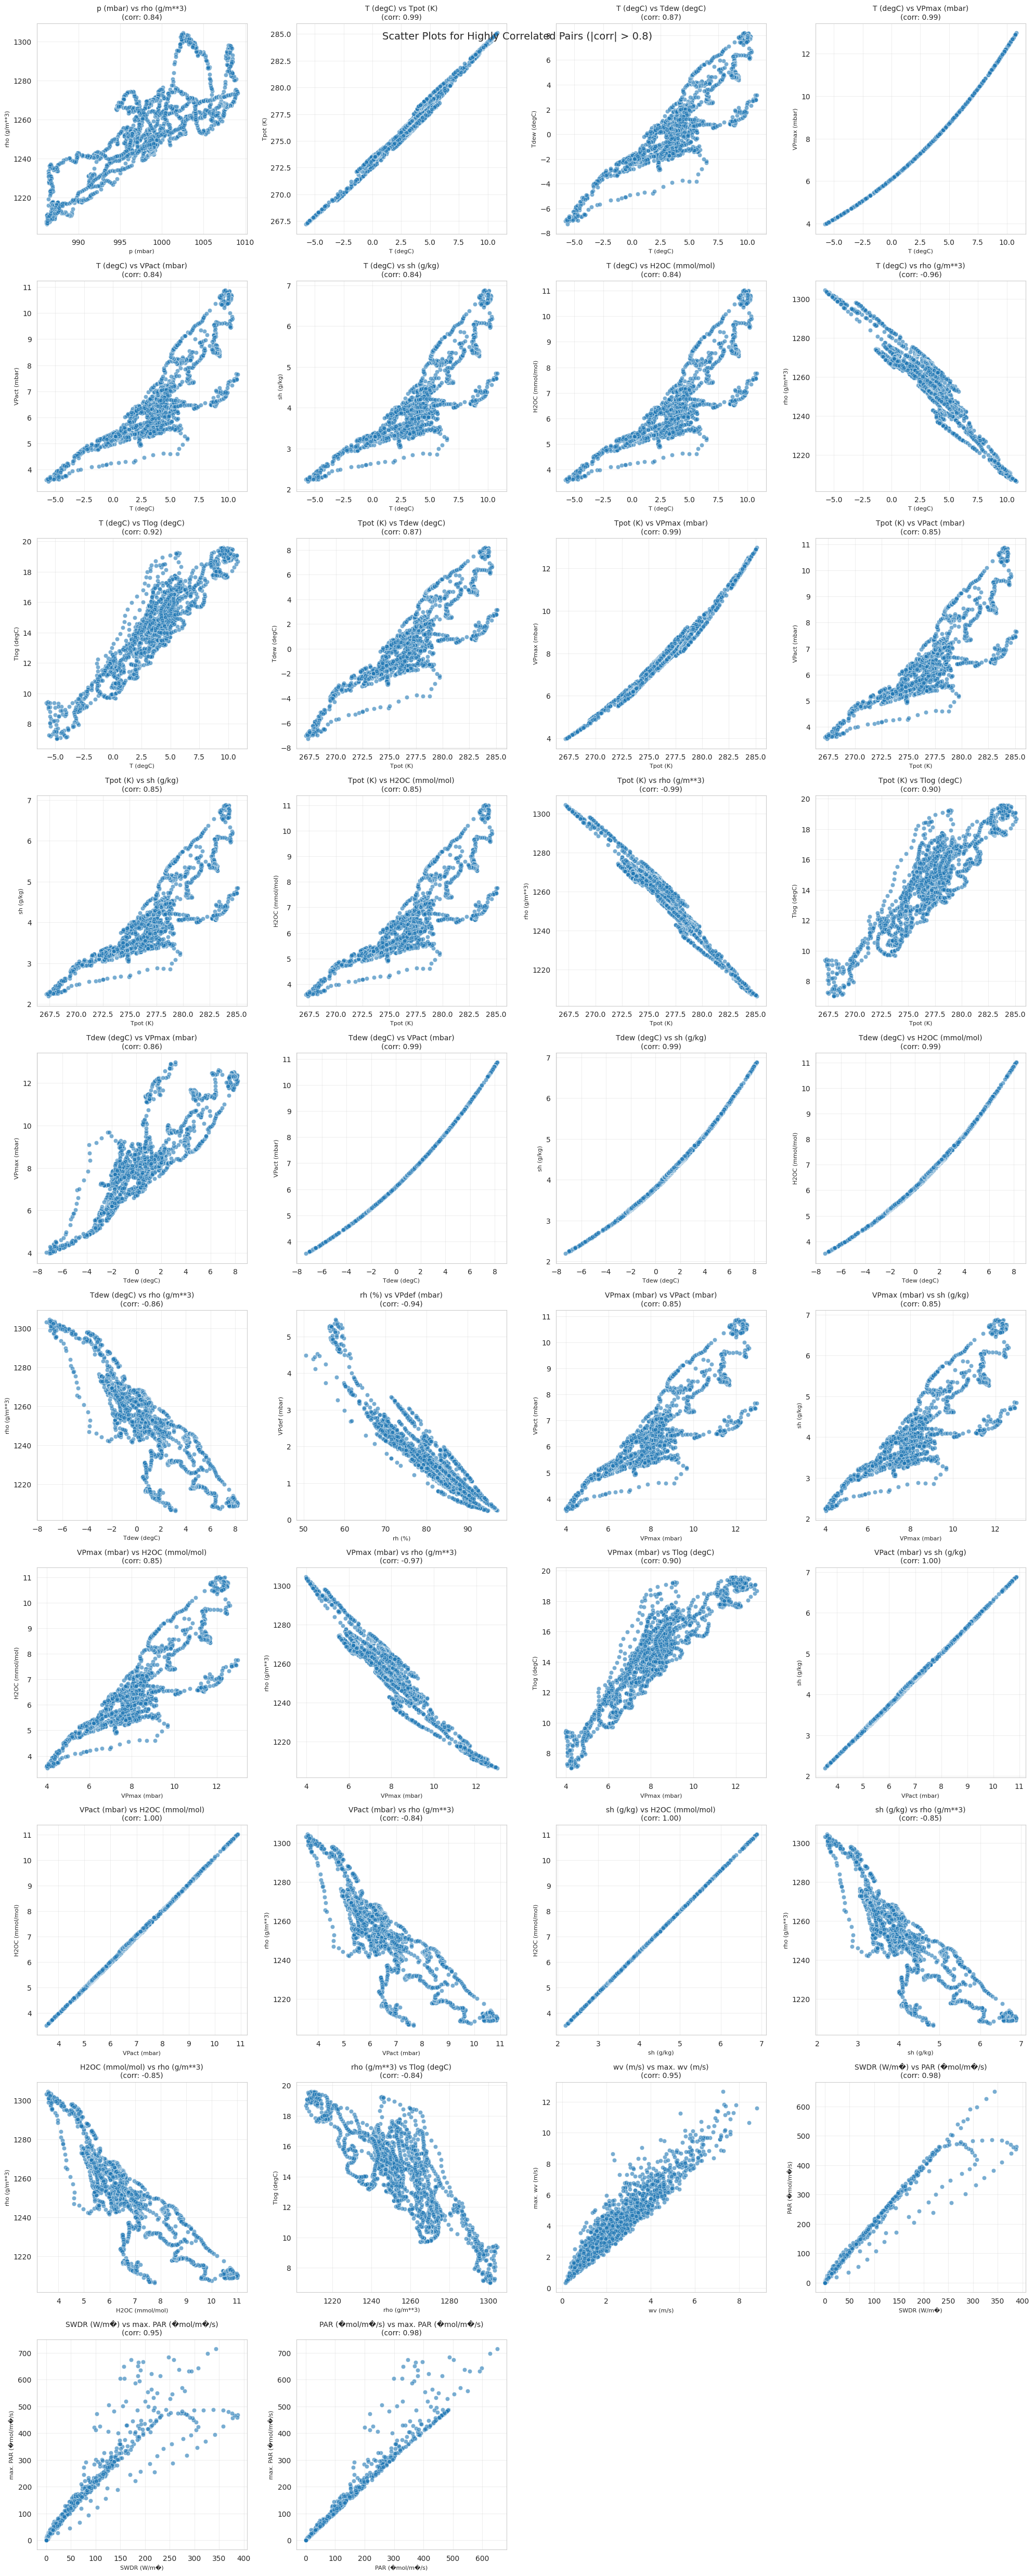

In [63]:
# Scatter plots for highly correlated pairs in a grid
if high_corr:
    n_pairs = len(high_corr)
    n_cols = min(4, n_pairs)  # Max 4 columns
    n_rows = (n_pairs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
    fig.suptitle('Scatter Plots for Highly Correlated Pairs (|corr| > 0.8)', fontsize=14, y=0.98)
    
    for i, pair in enumerate(high_corr):
        row = i // n_cols
        col_pos = i % n_cols
        
        if n_rows == 1 and n_cols == 1:
            ax = axes
        elif n_rows == 1:
            ax = axes[col_pos]
        else:
            ax = axes[row, col_pos]
        
        sns.scatterplot(x=df[pair[0]], y=df[pair[1]], ax=ax, alpha=0.6)
        ax.set_title(f'{pair[0]} vs {pair[1]}\n(corr: {pair[2]:.2f})', fontsize=10)
        ax.set_xlabel(pair[0], fontsize=8)
        ax.set_ylabel(pair[1], fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    total_plots = n_rows * n_cols
    for i in range(n_pairs, total_plots):
        row = i // n_cols
        col_pos = i % n_cols
        if n_rows == 1 and n_cols == 1:
            pass  # Only one plot
        elif n_rows == 1:
            axes[col_pos].set_visible(False)
        else:
            axes[row, col_pos].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No highly correlated pairs found (|corr| > 0.8)")

## 7. Autocorrelation Function (ACF)

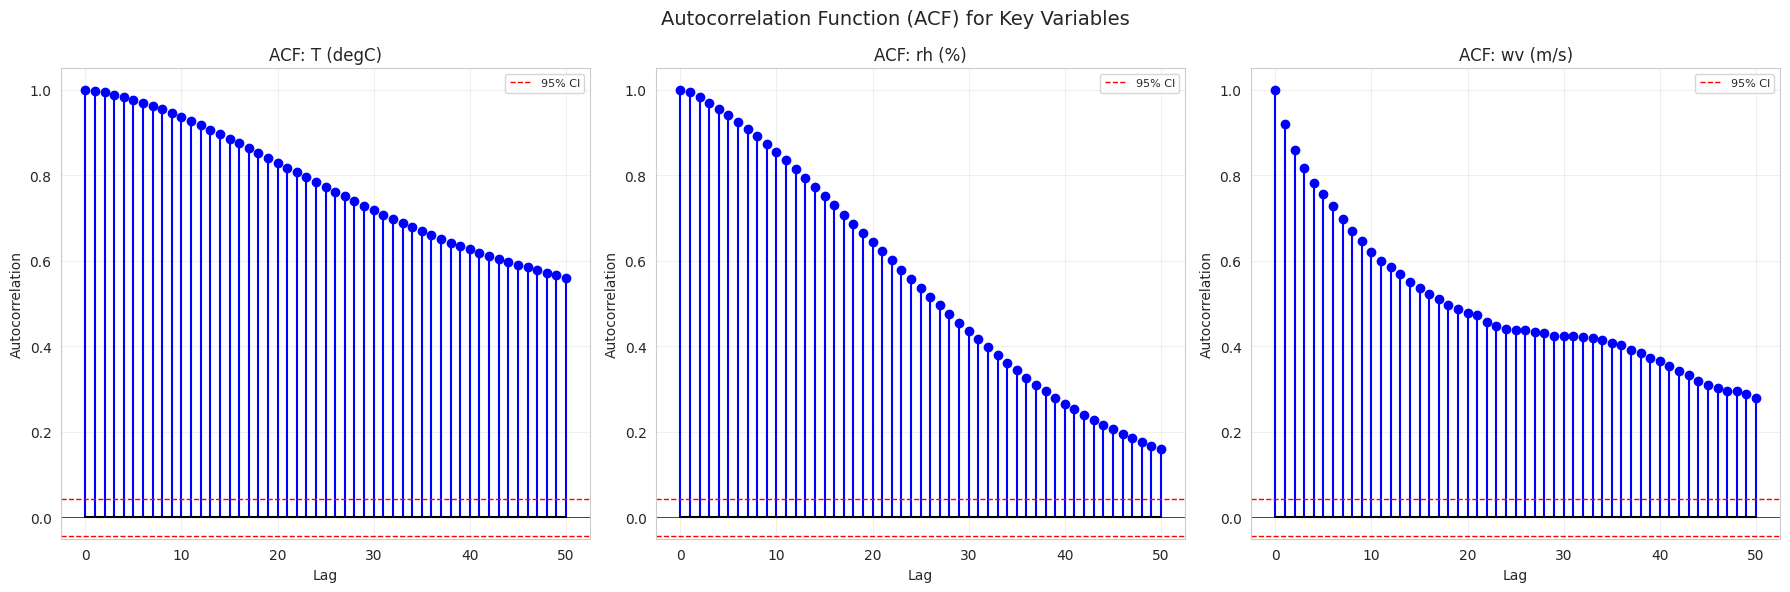

In [64]:
# ACF for key variables in a grid
key_vars = ['T (degC)', 'rh (%)', 'wv (m/s)']
n_vars = len([col for col in key_vars if col in df.columns])

fig, axes = plt.subplots(1, n_vars, figsize=(6*n_vars, 6))
fig.suptitle('Autocorrelation Function (ACF) for Key Variables', fontsize=14, y=0.98)

for i, col in enumerate(key_vars):
    if col in df.columns:
        acf_vals = acf(df[col], nlags=50)
        axes[i].stem(range(len(acf_vals)), acf_vals, linefmt='b-', markerfmt='bo', basefmt='k-')
        axes[i].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
        axes[i].axhline(y=-1.96/np.sqrt(len(df)), color='r', linestyle='--', linewidth=1, label='95% CI')
        axes[i].axhline(y=1.96/np.sqrt(len(df)), color='r', linestyle='--', linewidth=1)
        axes[i].set_title(f'ACF: {col}', fontsize=12)
        axes[i].set_xlabel('Lag', fontsize=10)
        axes[i].set_ylabel('Autocorrelation', fontsize=10)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

## 8. Outlier Detection (IQR Method)

Number of outliers per variable (IQR method):
p (mbar): 0
T (degC): 92
Tpot (K): 67
Tdew (degC): 83
rh (%): 86
VPmax (mbar): 131
VPact (mbar): 97
VPdef (mbar): 99
sh (g/kg): 101
H2OC (mmol/mol): 101
rho (g/m**3): 1
wv (m/s): 59
max. wv (m/s): 56
wd (deg): 123
rain (mm): 84
raining (s): 178
SWDR (W/m�): 324
PAR (�mol/m�/s): 309
max. PAR (�mol/m�/s): 302
Tlog (degC): 3


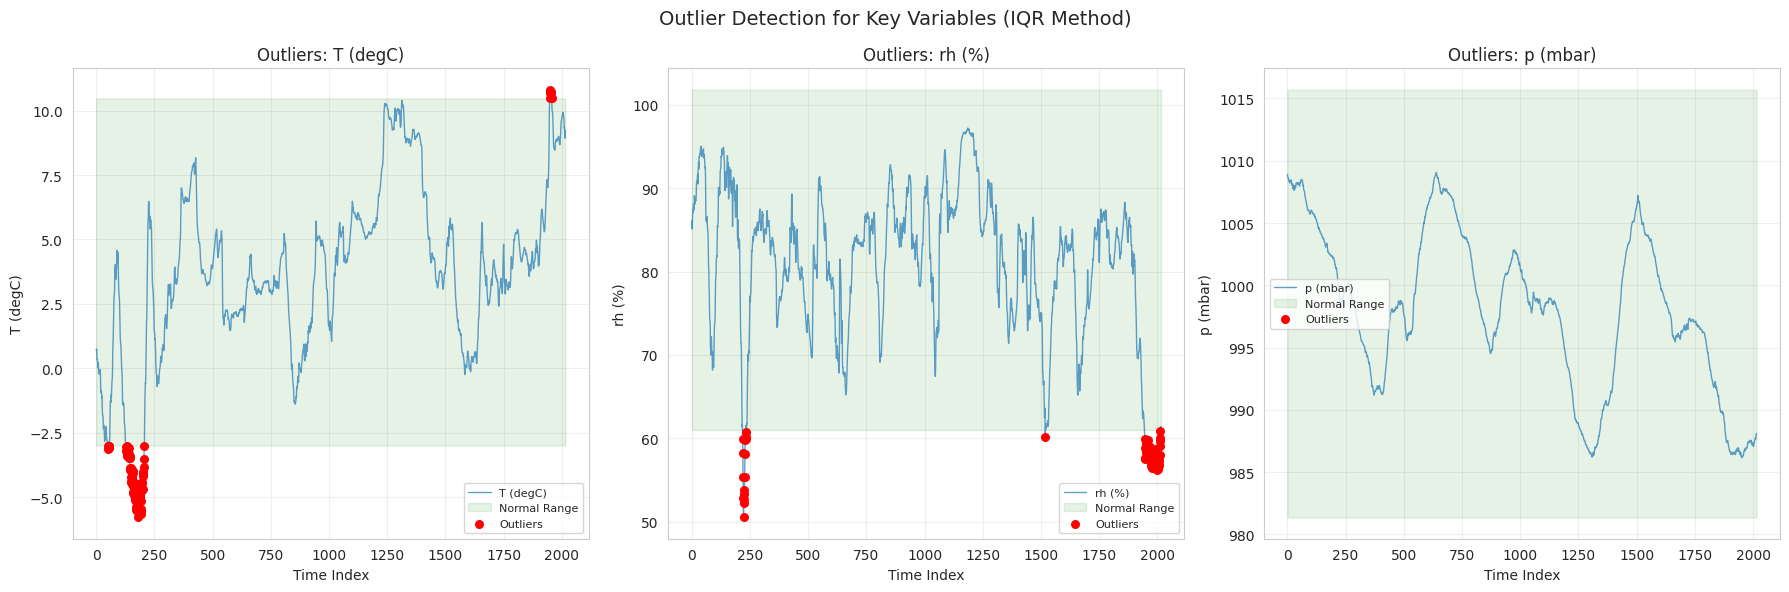

In [65]:
# Outlier detection using IQR method
outliers = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print("Number of outliers per variable (IQR method):")
for col, count in outliers.items():
    print(f"{col}: {count}")

# Visualize outliers for key variables in a grid
key_outlier_vars = ['T (degC)', 'rh (%)', 'p (mbar)']
available_vars = [col for col in key_outlier_vars if col in df.columns]

fig, axes = plt.subplots(1, len(available_vars), figsize=(6*len(available_vars), 6))
fig.suptitle('Outlier Detection for Key Variables (IQR Method)', fontsize=14, y=0.98)

for i, col in enumerate(available_vars):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    axes[i].plot(df.index, df[col], label=col, alpha=0.7, linewidth=1)
    axes[i].fill_between(df.index, lower_bound, upper_bound, color='green', alpha=0.1, label='Normal Range')
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    axes[i].scatter(df[outlier_mask].index, df[outlier_mask][col], color='red', s=30, label='Outliers', zorder=5)
    axes[i].set_title(f'Outliers: {col}', fontsize=12)
    axes[i].set_xlabel('Time Index', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Trend Analysis (Linear Regression)

T (degC) - Trend Slope: 0.002761, Intercept: 0.9769
rh (%) - Trend Slope: -0.003964, Intercept: 85.0203
wv (m/s) - Trend Slope: 0.001022, Intercept: 1.3666


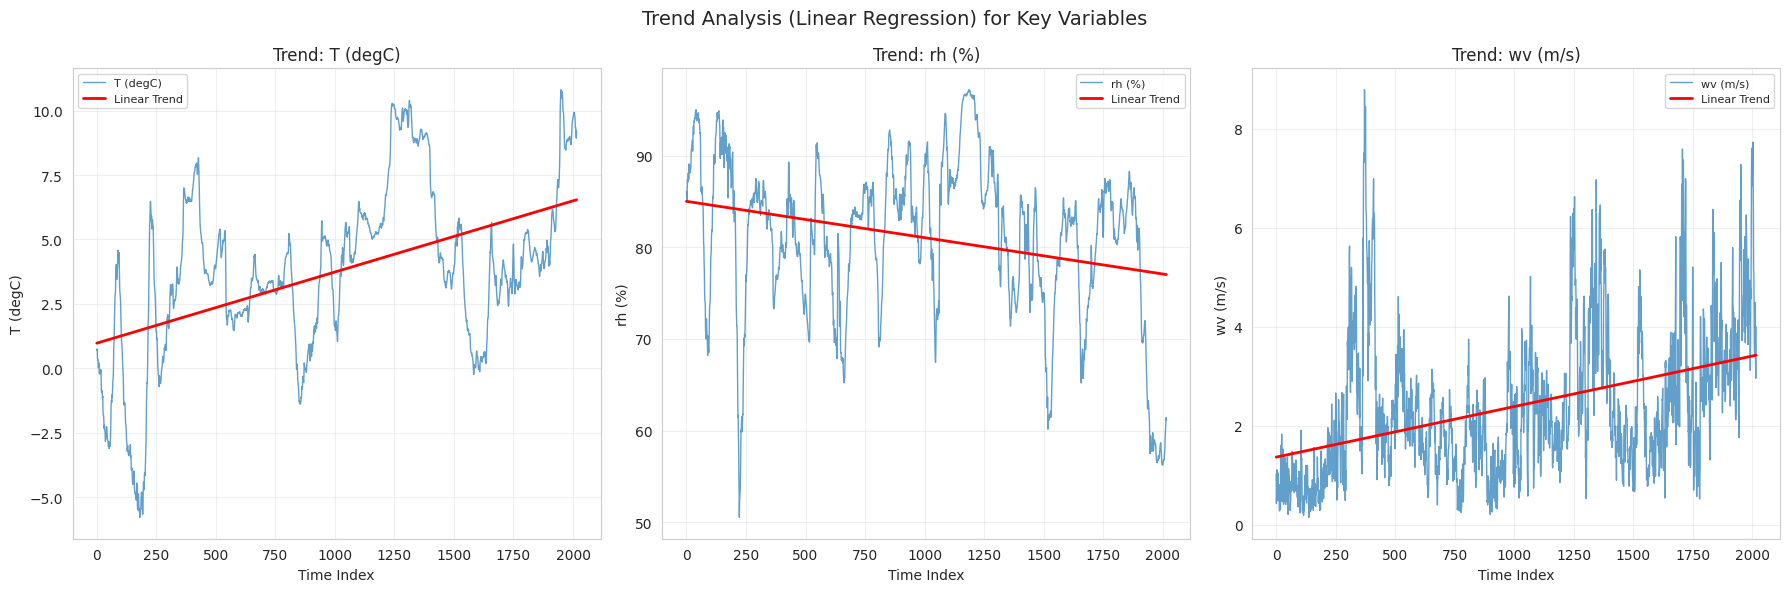

In [66]:
# Linear trend analysis for key variables in a grid
fig, axes = plt.subplots(1, len(key_vars), figsize=(6*len(key_vars), 6))
fig.suptitle('Trend Analysis (Linear Regression) for Key Variables', fontsize=14, y=0.98)

for i, col in enumerate(key_vars):
    if col in df.columns:
        X = np.arange(len(df)).reshape(-1, 1)
        y = df[col].values
        model = LinearRegression()
        model.fit(X, y)
        trend = model.predict(X)
        
        axes[i].plot(df.index, df[col], label=col, alpha=0.7, linewidth=1)
        axes[i].plot(df.index, trend, label='Linear Trend', color='red', linewidth=2)
        axes[i].set_title(f'Trend: {col}', fontsize=12)
        axes[i].set_xlabel('Time Index', fontsize=10)
        axes[i].set_ylabel(col, fontsize=10)
        axes[i].legend(fontsize=8)
        axes[i].grid(True, alpha=0.3)
        
        print(f"{col} - Trend Slope: {model.coef_[0]:.6f}, Intercept: {model.intercept_:.4f}")

plt.tight_layout()
plt.show()

## 10. Wind Rose Plot

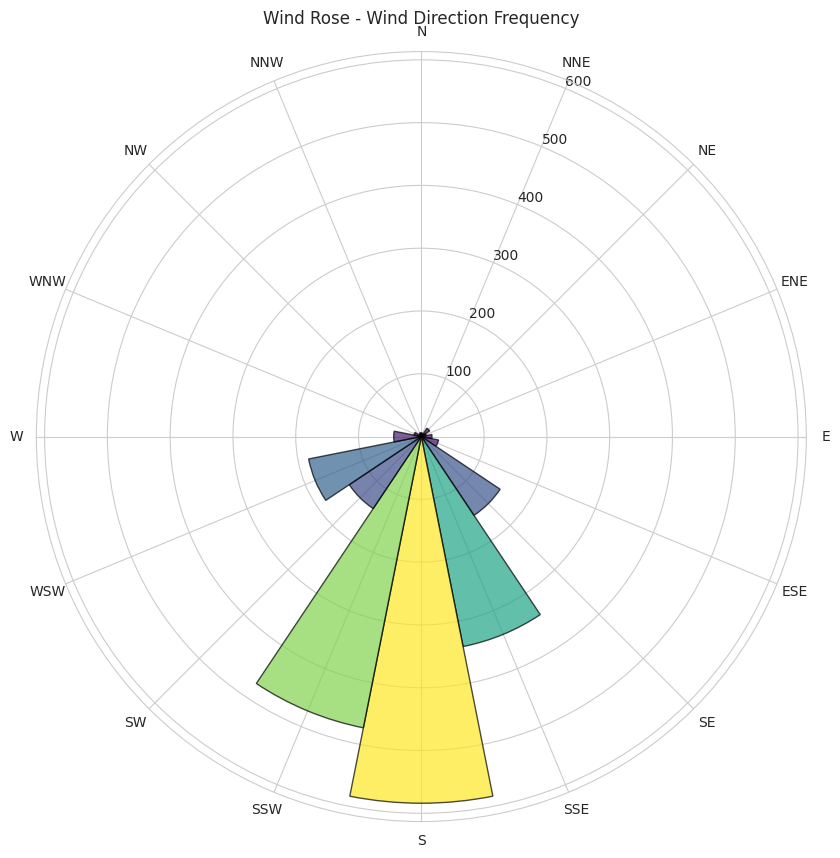

Most frequent wind direction: S (584.0 occurrences)


In [67]:
# Wind Rose Plot
if 'wd (deg)' in df.columns and 'wv (m/s)' in df.columns:
    directions = df['wd (deg)'].values
    speeds = df['wv (m/s)'].values
    
    # Bin directions into 16 sectors (22.5 degrees each)
    bins = np.arange(0, 360, 22.5)
    labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    dir_bins = np.digitize(directions, bins) - 1
    dir_bins[dir_bins == 16] = 0  # Wrap around
    dir_bins[dir_bins == -1] = 0  # Handle edge case
    
    # Calculate frequency for each direction
    freq = np.zeros(16)
    for i in range(16):
        freq[i] = np.sum(dir_bins == i)
    
    # Create polar plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)
    theta = np.linspace(0, 2*np.pi, 16, endpoint=False)
    bars = ax.bar(theta, freq, width=2*np.pi/16, bottom=0.0, align='center', alpha=0.7, edgecolor='black')
    
    # Color bars by frequency
    colors = plt.cm.viridis(freq / freq.max())
    for bar, color in zip(bars, colors):
        bar.set_facecolor(color)
    
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(theta)
    ax.set_xticklabels(labels)
    ax.set_title('Wind Rose - Wind Direction Frequency', pad=20)
    plt.show()
    
    print(f"Most frequent wind direction: {labels[np.argmax(freq)]} ({freq.max()} occurrences)")

## 11. Pair Plot (Correlation Matrix Visualization)

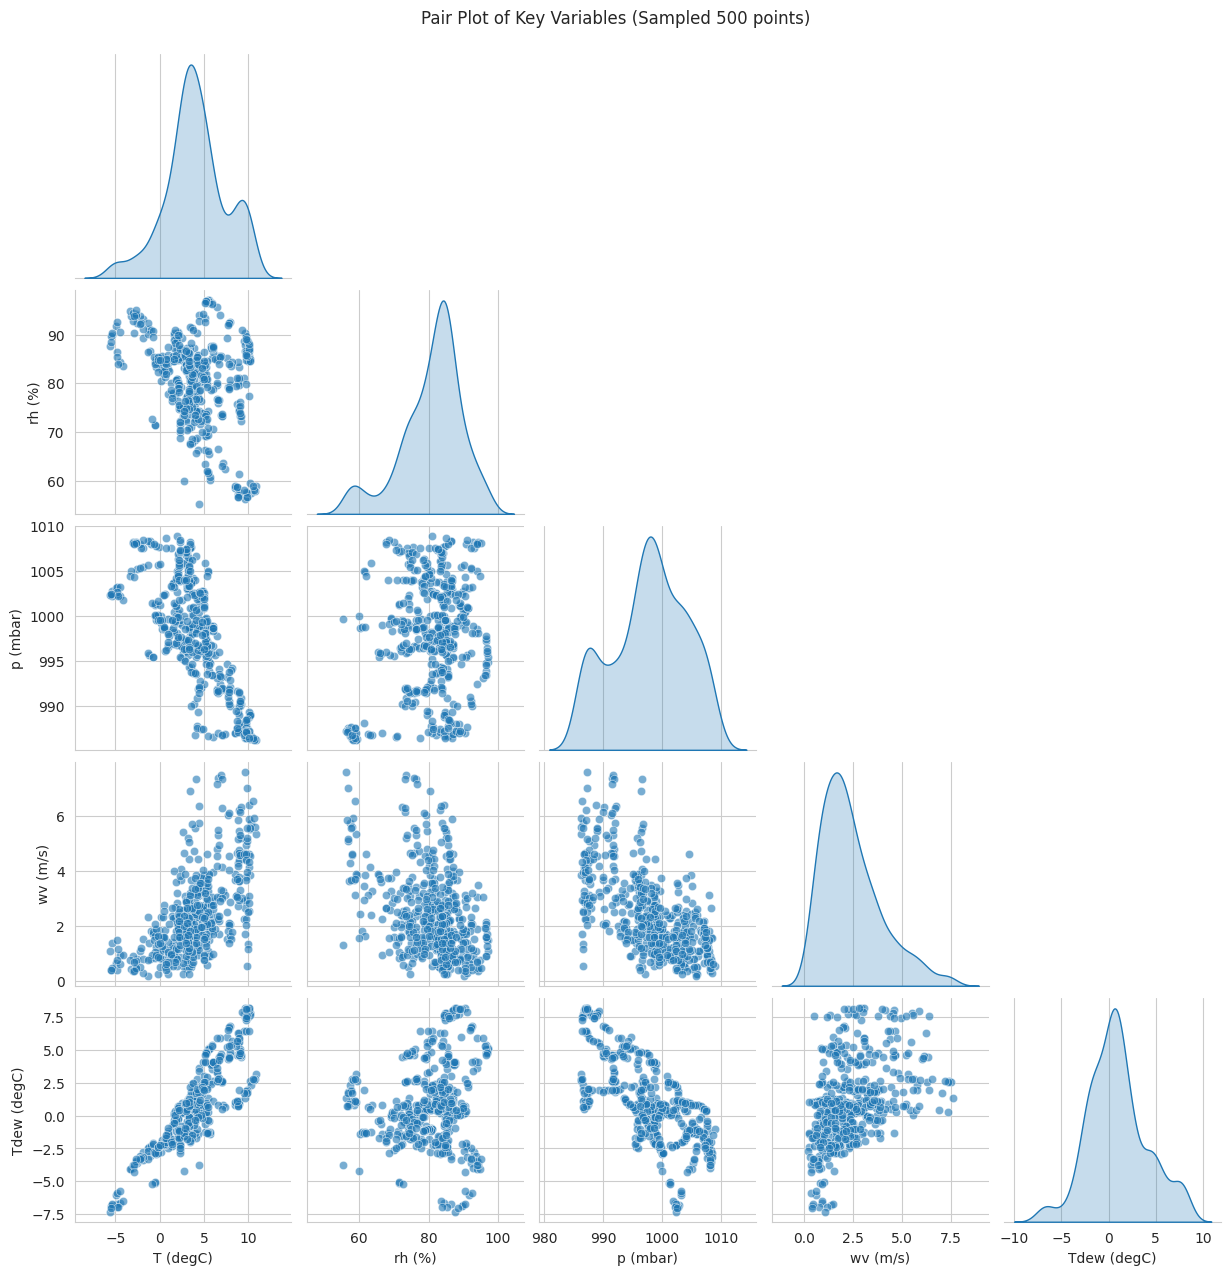

In [68]:
# Pair plot for selected key variables (to avoid overcrowding)
selected_cols = ['T (degC)', 'rh (%)', 'p (mbar)', 'wv (m/s)', 'Tdew (degC)']
available_cols = [col for col in selected_cols if col in df.columns]

if len(available_cols) > 0:
    sample_df = df[available_cols].sample(min(500, len(df)), random_state=42)
    sns.pairplot(sample_df, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
    plt.suptitle('Pair Plot of Key Variables (Sampled 500 points)', y=1.02)
    plt.show()
else:
    print("Selected columns not found in dataframe")

## 12. Principal Component Analysis (PCA)

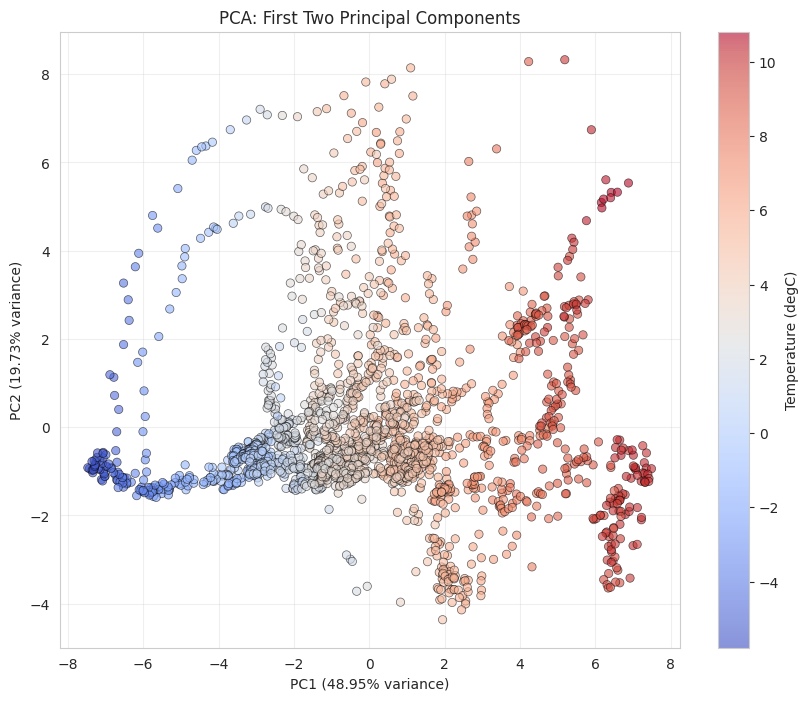

Explained Variance Ratio (PC1, PC2): [0.48951002 0.19728945]
Total Explained Variance: 68.68%


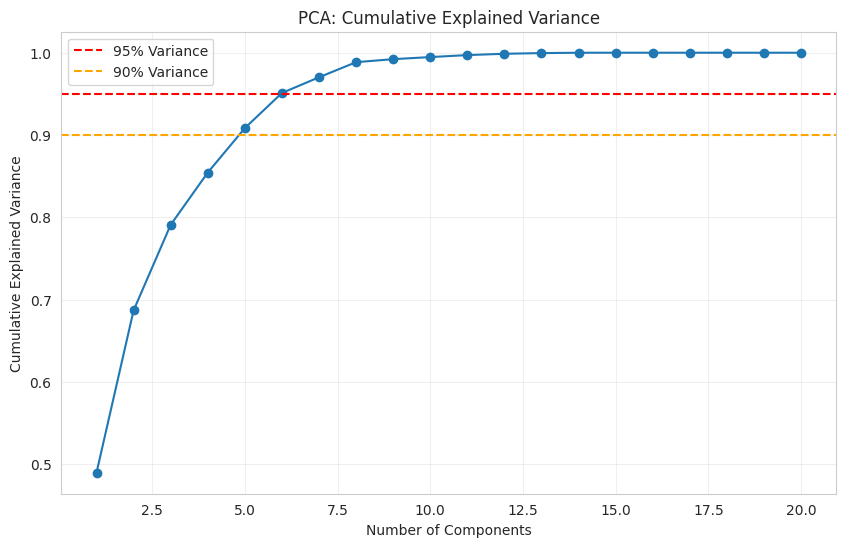


Number of components needed to explain 95% variance: 6


In [69]:
# PCA - Dimensionality Reduction
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA with 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], 
                     c=df['T (degC)'] if 'T (degC)' in df.columns else range(len(df)), 
                     cmap='coolwarm', alpha=0.6, edgecolors='k', linewidth=0.5)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA: First Two Principal Components')
plt.colorbar(scatter, label='Temperature (degC)' if 'T (degC)' in df.columns else 'Index')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Explained Variance Ratio (PC1, PC2): {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {np.sum(pca.explained_variance_ratio_):.2%}")

# Full PCA to see cumulative variance
pca_full = PCA()
pca_full.fit(df_scaled)
cumsum = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumsum) + 1), cumsum, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
plt.legend()
plt.show()

n_components_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\nNumber of components needed to explain 95% variance: {n_components_95}")